In [ ]:
l_c = #"00" #Commented when executing All_maps.ipynb

i_fil = "2"

cosmoin = ["LCDM", "fR4", "fR5", "fR6", "LCDM_0.15"]

c_run = 0 #in sincro with the value in All_maps.ipynb

pre_path = ".../Weaklensing" # "home/user/Desktop/Simulation_folder/..." Specify the path

folderin = pre_path + "/input_relative/" + cosmoin[c_run] + "/" + l_c + "/" 
filin = folderin + i_fil + "_kappaBApp.fits"

folderout = pre_path + "/output_relative/" + cosmoin[c_run] + "/" + l_c + "/"
    
search = ['peaks', 'valleys']
p_obj = search[1]

smooth_filters = [1, 2.5, 5]
smooth_filter_set = smooth_filters[1]

path = folderout + p_obj + '_' + i_fil +'k/'

threshold_value = 4

stop_th = 3

SNR_threshold = 2.5

color = ["dodgerblue", "green", "red"]

n_gal = [10, 30, 50]
n_gal_set = n_gal[1]

ell_err = 0.3

In [2]:
%matplotlib inline
from setuptools import setup
import warnings
import cv2
import nbformat as nbf
import nbconvert as nbc
import papermill as pm
import decimal
import imageio  # for reading image files
from html.parser import HTMLParser
import matplotlib
import matplotlib.cm as cm
from matplotlib.path import Path
from matplotlib.image import imread
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter, MultipleLocator, FixedLocator, FixedFormatter, LogLocator, LogFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import numpy.distutils.ccompiler
import glob
import math
import random as rnd
import scipy
from scipy import interpolate, integrate
from scipy.interpolate import griddata, interp1d, UnivariateSpline
import scipy.fftpack as fftengine
import pylab
import seaborn as sns
import skimage.filters
import skimage.color
import skimage.io
from skimage import segmentation, data, filters, measure, morphology
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon
from shapely import Point, Polygon
import camb
from camb import model, initialpower
from astropy.convolution import convolve, convolve_fft
from astropy.io import fits
import astropy.units as u
from astropy.units import deg
from astropy.cosmology import Planck18 as cosmo
from astropy.cosmology import LambdaCDM as lcdm
import pyccl as ccl
from FyeldGenerator import generate_field
from lenstools import dataExtern, ConvergenceMap, ShearMap, GaussianNoiseGenerator
import shutil
import re
import os
import sys
import magic
sys.modules["mpi4py"] = None
plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "text.usetex": True,
    "pgf.rcfonts": False,
})

# Add the current directory to the sys.path environment variable
sys.path.append("/home/.../Weaklensing/Code")

import Finder_functions as mystery

# Read the notebook path
notebook_path = "/home/leonardo/.../Weaklensing/Code/Tunnel_void_finder.ipynb"  # Enter the correct path to your notebook


/tmp/ipykernel_857898/1944986782.py:23: DeprecationWarning: 

  `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
  of the deprecation of `distutils` itself. It will be removed for
  Python >= 3.12. For older Python versions it will remain present.
  It is recommended to use `setuptools < 60.0` for those Python versions.
  For more details, see:
    https://numpy.org/devdocs/reference/distutils_status_migration.html 


  import numpy.distutils.ccompiler


In [3]:
#source_folder = "/home/.../WeakLensing/z1.0/ΛCDM/output_relative/"
#destination_folder = "/home/.../Weaklensing/input_relative/"

#source_folder = "/home/user/..."
#destination_folder = "/home/user"/home/user/Desktop/Simulation_folder/..."

#mystery.eliminate_files(source_folder, "voids_radii.txt", 256)
#mystery.copy_files(source_folder, destination_folder, "voids_radii.txt", 256)
#mystery.create_ambient(pre_path, 256)

fov [deg] =  5.0
number of pixels =  2048
zs =  1.00094343049
pixel size [arcmin] =  0.146484375
fov [arcmin] 300.0
sigma_noise in arcmin (final N)= 0.006180387232371033
sigma GSN per pixel = 0.26439566310109297
sigma of the final smooth filter in pixel = 12.067955732250411

 number of connected regions SNR>= 0 :  102
 number of connected regions SNR>= 0.5 :  167
 number of connected regions SNR>= 1 :  232
 number of connected regions SNR>= 1.5 :  302
 number of connected regions SNR>= 2 :  336
 number of connected regions SNR>= 2.5 :  324
 number of connected regions SNR>= 3 :  287
 number of connected regions SNR>= 3.5 :  203
 number of connected regions SNR>= 4 :  102


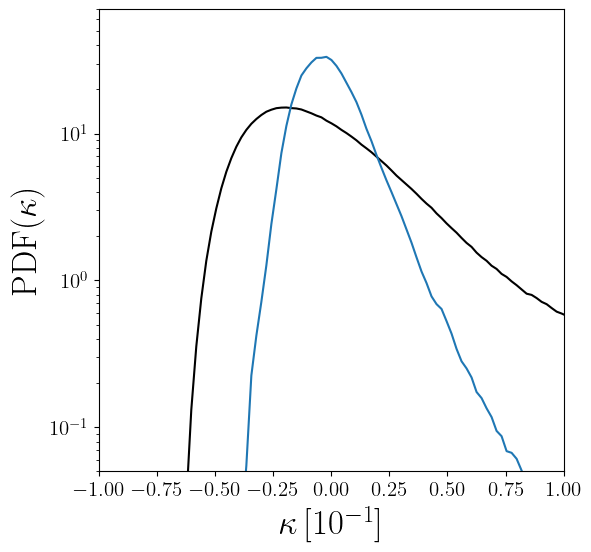

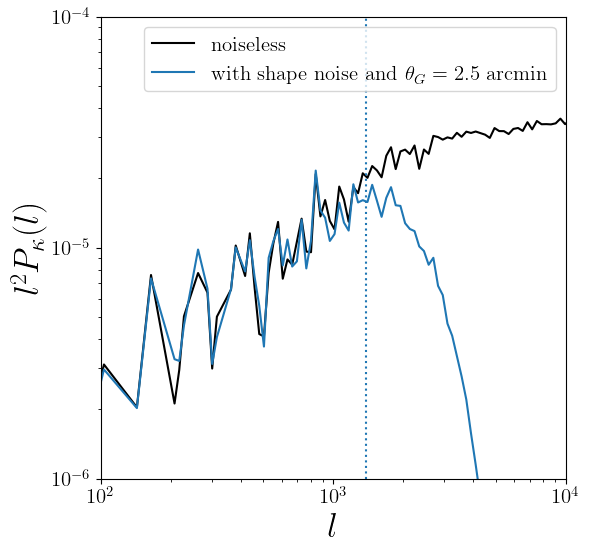

In [4]:
mystery.cleaning_ambient(folderout, search, i_fil)
SNR_final, kappa_final, kappa_original, fov_arcmin, npixel = mystery.connected_regions(filin,
                                                                                       folderout,
                                                                                       ell_err,
                                                                                       smooth_filter_set,
                                                                                       n_gal_set,
                                                                                       path,
                                                                                       p_obj,
                                                                                       i_fil,
                                                                                       1234)
                                                                                        #int(time.time() * 1000)

mystery.map_PDF_and_Pl(folderout,
                       SNR_final,
                       kappa_original,
                       kappa_final,
                       fov_arcmin,
                       smooth_filter_set,
                       512,
                       256)

Voids found: 84
Voids after cleaning: 82


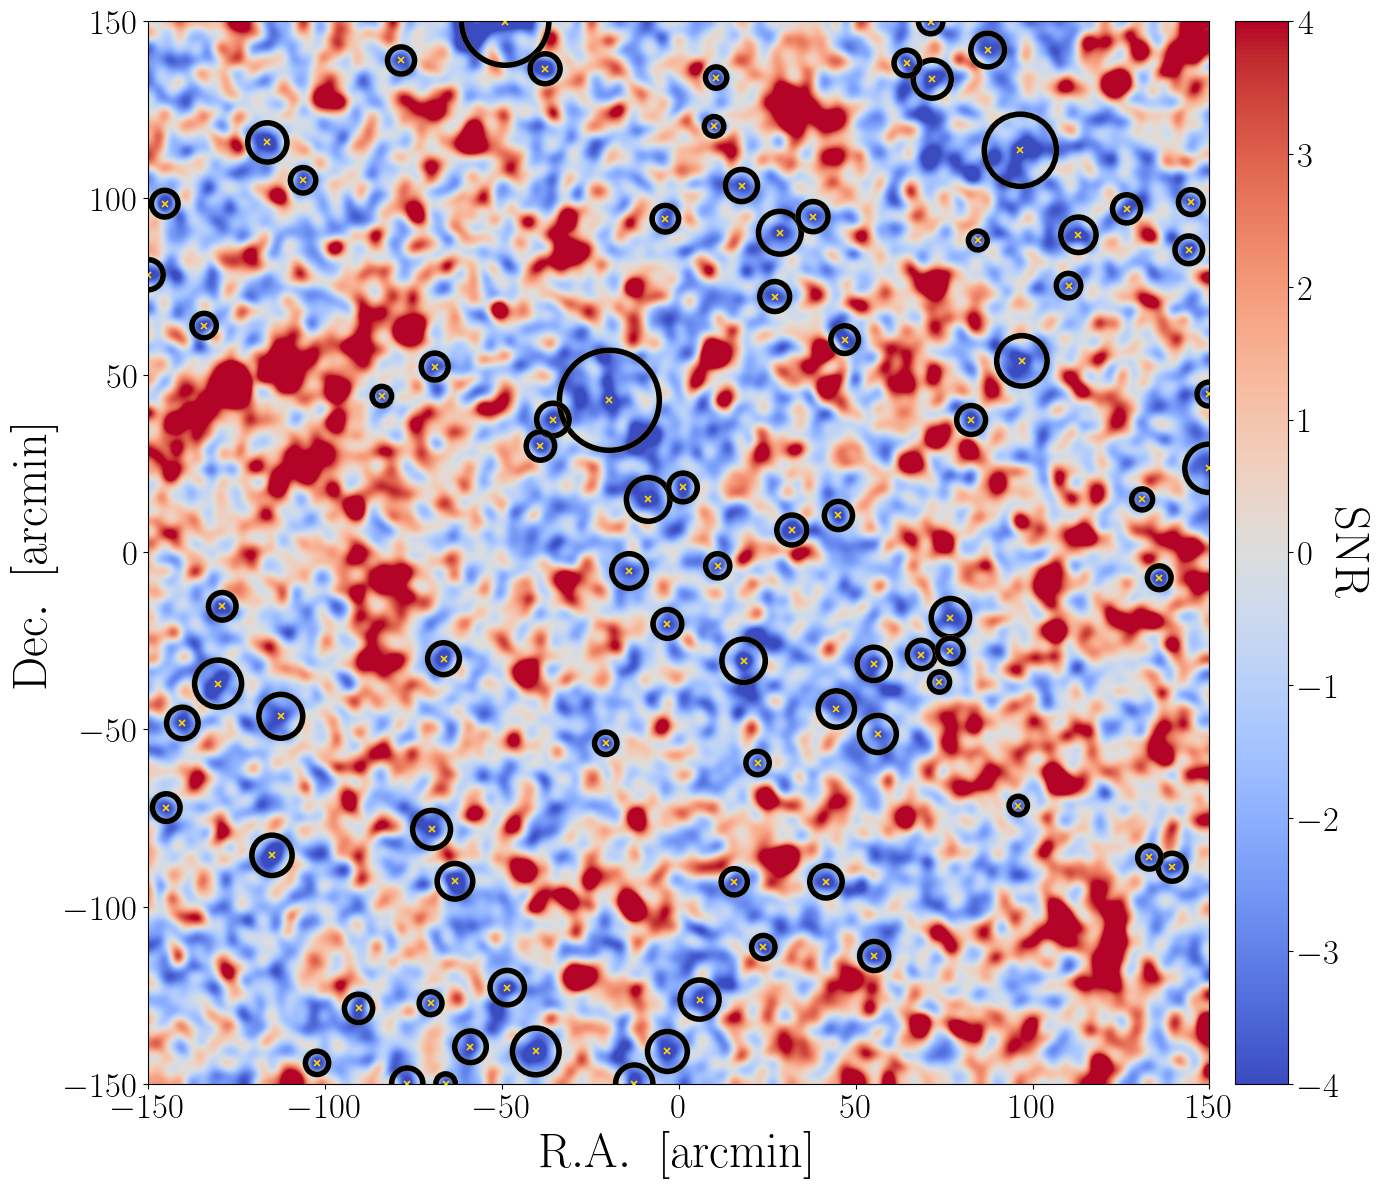

In [5]:
exist, x_v_arc, y_v_arc, snr_map = mystery.void_minima(path, 
                                                       p_obj,
                                                       smooth_filter_set,
                                                       SNR_final,
                                                       fov_arcmin,
                                                       threshold_value, 
                                                       stop_th)
mystery.void_radii(exist, 
                   folderout, 
                   snr_map, 
                   fov_arcmin, 
                   threshold_value, 
                   x_v_arc, y_v_arc, 
                   npixel, 
                   SNR_threshold)

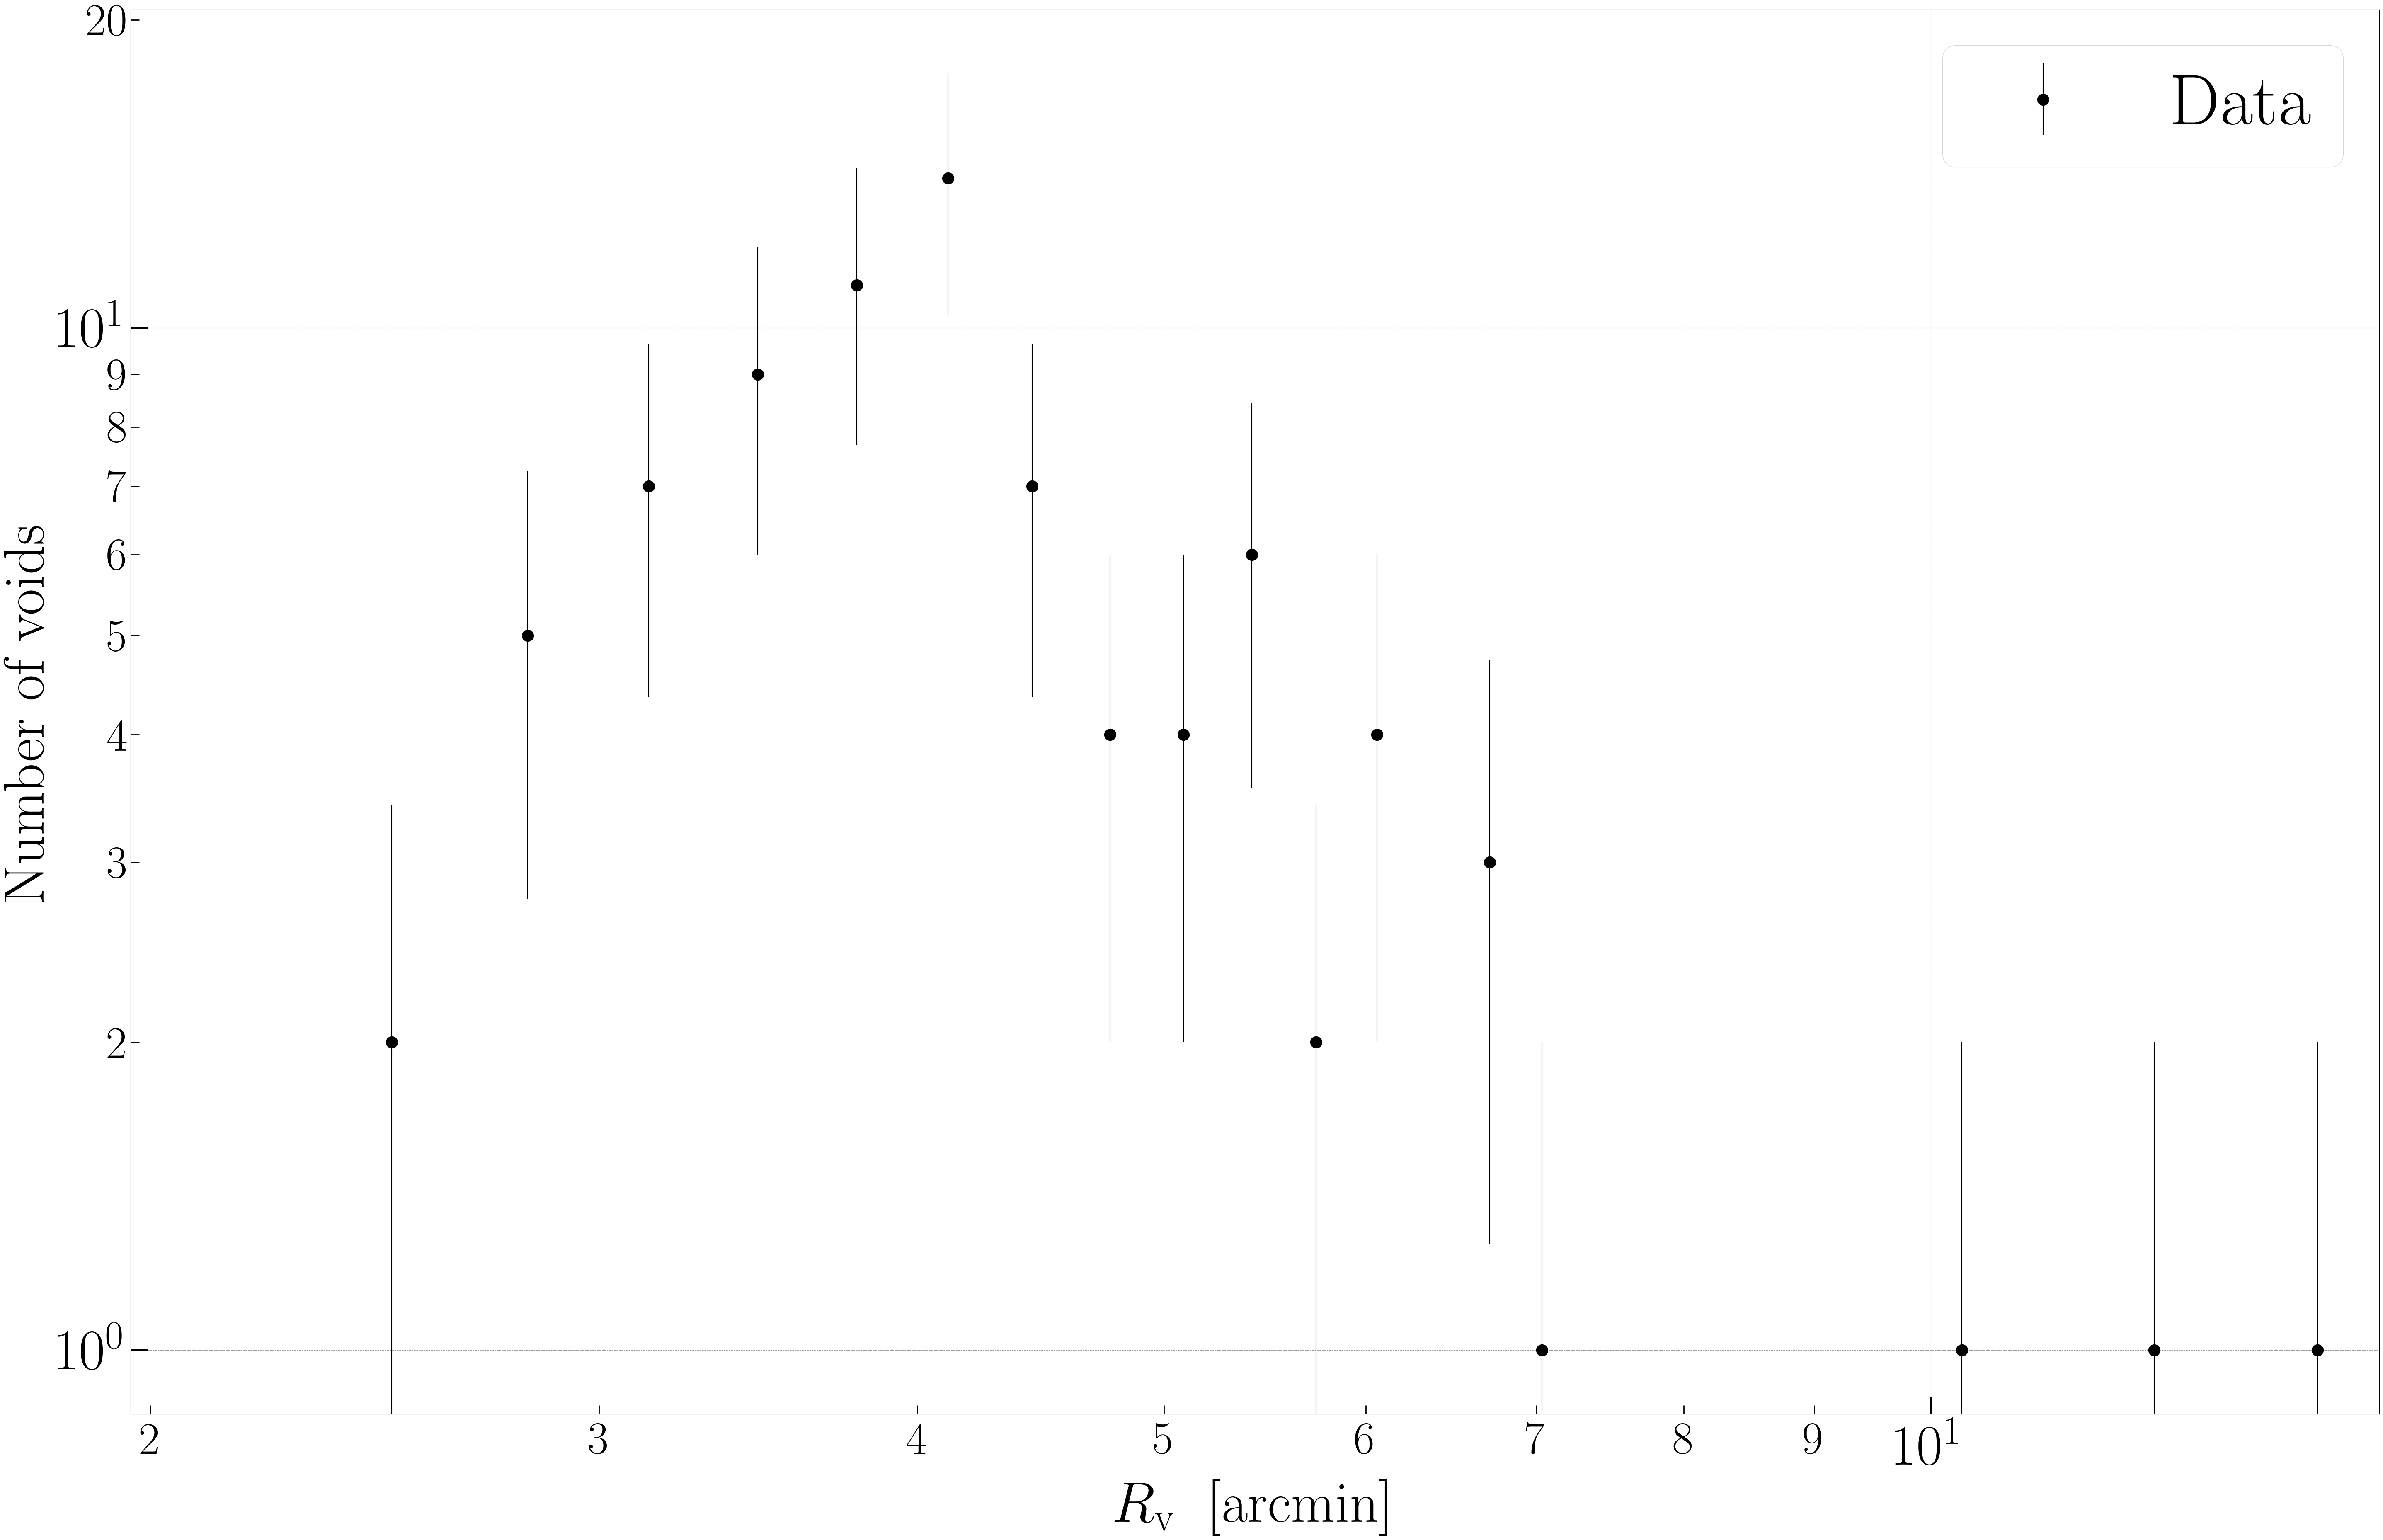

In [6]:
if exist:
    max_r, min_r, bins, vsf, err_vsf = mystery.map_vsf(folderout, 40, True, False, True)
    equibins, folder_names = mystery.create_stacks_folders(folderout, min_r, max_r, i_fil, smooth_filter_set, 3, False)
else:
    print("No voids found")

void 1 : (95.94727, -71.48438) radius:  2.58965 arcmin
void 2 : (84.52148, 88.03711) radius:  2.64288 arcmin
void 3 : (-65.91797, -150.0) radius:  2.73171 arcmin
void 4 : (-83.93555, 44.0918) radius:  2.73928 arcmin
void 5 : (9.96094, 120.26367) radius:  2.74579 arcmin
void 6 : (73.68164, -36.62109) radius:  2.84114 arcmin
void 7 : (130.95703, 14.94141) radius:  2.95044 arcmin
void 8 : (10.54688, 134.0332) radius:  2.99781 arcmin
void 9 : (-20.6543, -53.90625) radius:  3.15089 arcmin
void 10 : (-70.16602, -127.29492) radius:  3.20702 arcmin
void 11 : (-102.24609, -144.14062) radius:  3.2807 arcmin
void 12 : (133.00781, -86.13281) radius:  3.28894 arcmin
void 13 : (23.87695, -111.47461) radius:  3.29082 arcmin
void 14 : (22.26562, -59.47266) radius:  3.29416 arcmin
void 15 : (135.79102, -7.17773) radius:  3.34026 arcmin
void 16 : (149.85352, 44.67773) radius:  3.37046 arcmin
void 17 : (10.98633, -3.80859) radius:  3.40607 arcmin
void 18 : (71.19141, 149.85352) radius:  3.43513 arcmin
vo

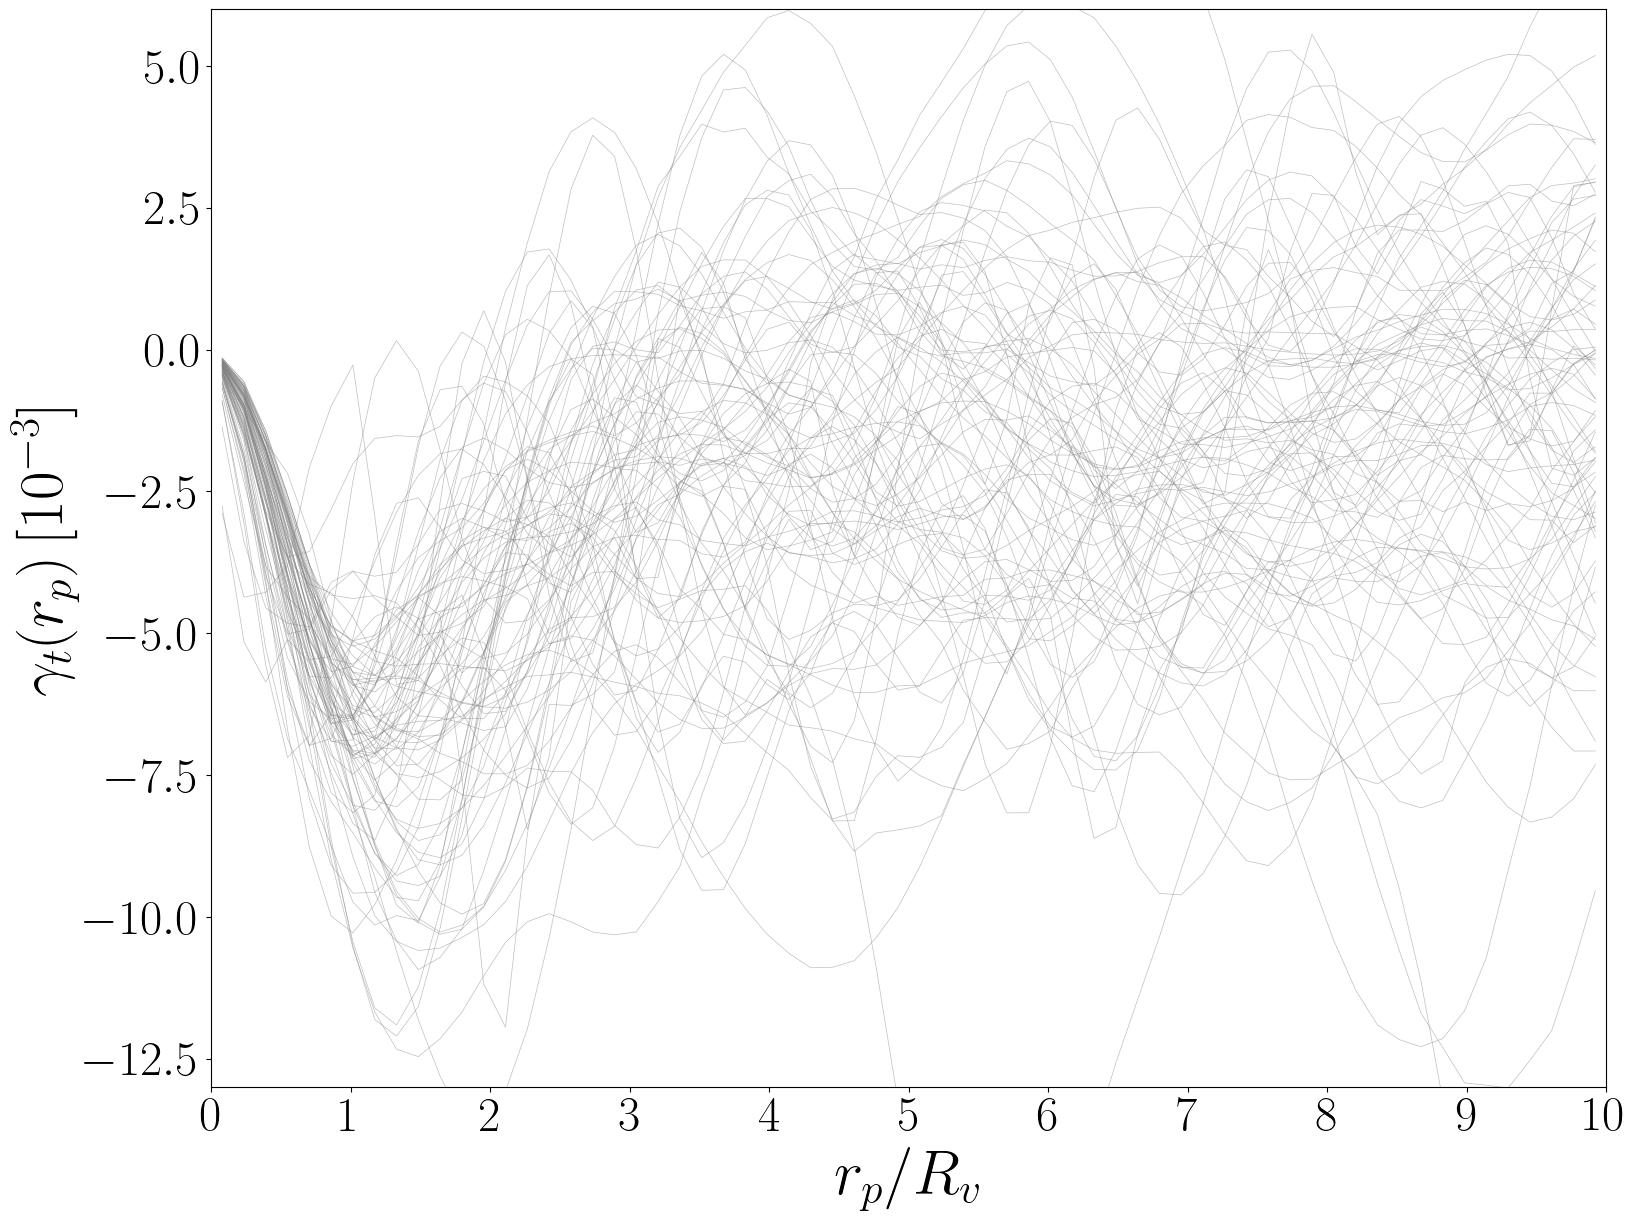

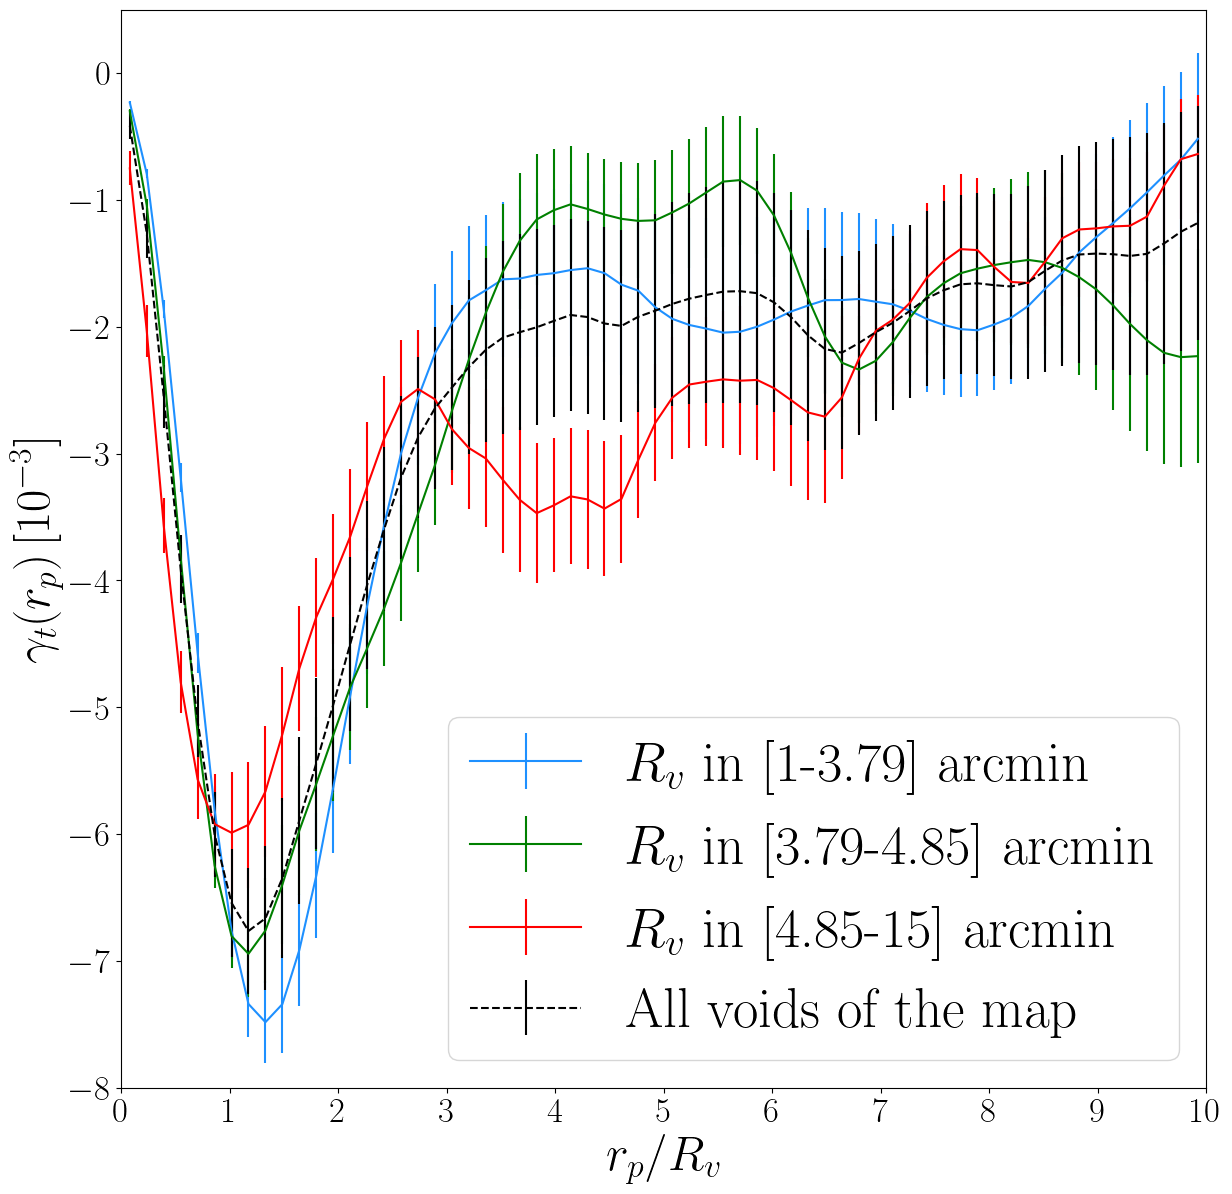

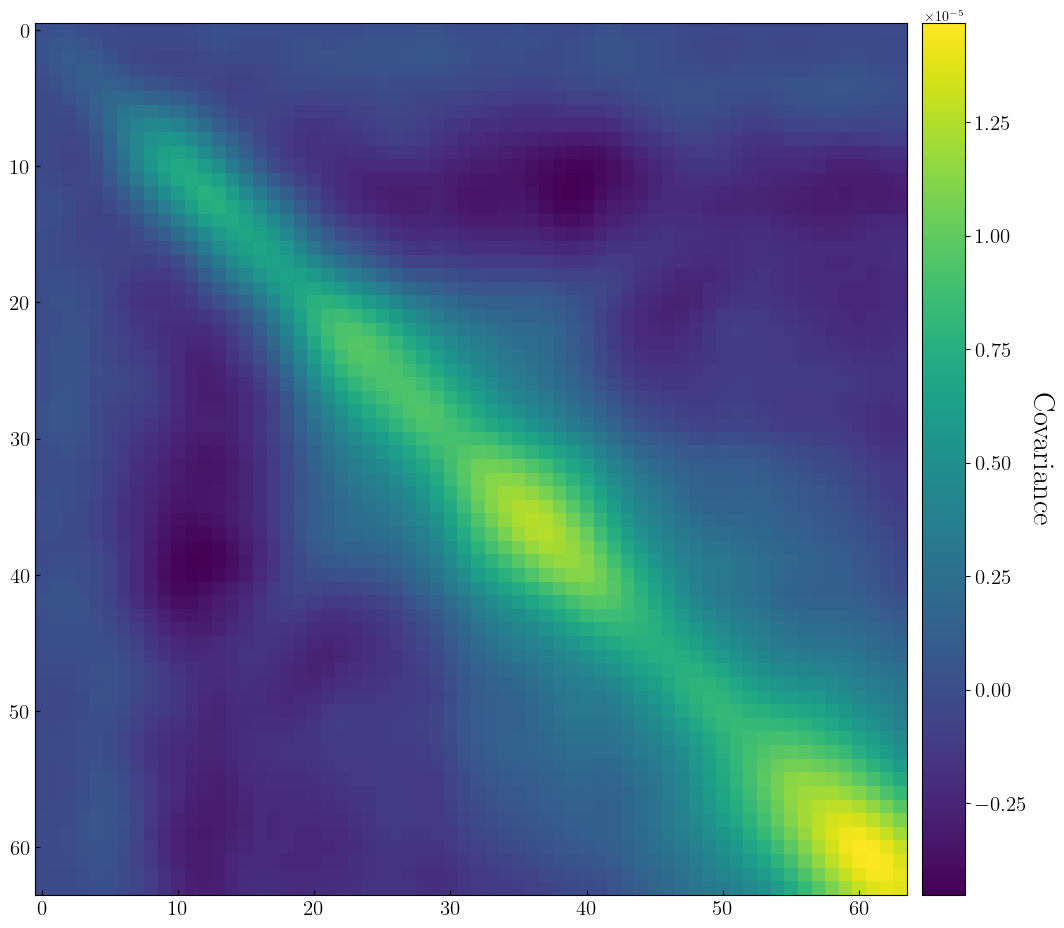

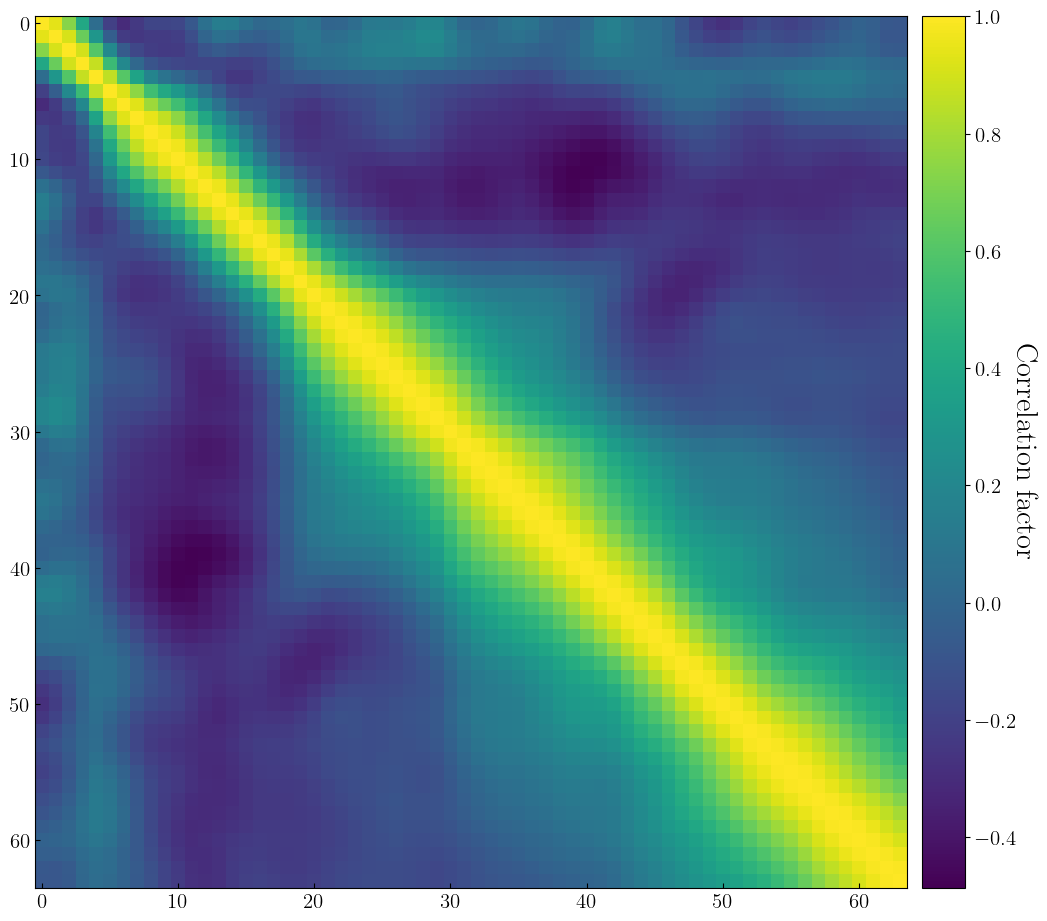

In [7]:
if exist:
    r_out, nbins, fradius = mystery.shells_profile(folderout,
                                                   i_fil,
                                                   smooth_filter_set,
                                                   folder_names,
                                                   kappa_final,
                                                   equibins,
                                                   fov_arcmin,
                                                   npixel,
                                                   n_gal_set,
                                                   ell_err,
                                                   64,
                                                   20,
                                                   True)
    
    mystery.process_shear_map(folderout, l_c, folder_names, color, r_out, nbins, fradius, True)
    
else:
    print("No voids found")